# Diabetic_Retinopathy

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Loading Data

In [99]:
Datset = arff.loadarff("datasets\Diabetic_Retinopathy\messidor_features.arff") 

In [100]:
df = pd.DataFrame(Datset[0])
df.head()

0    1     2     3     4     5     6     7          8          9  \
0  1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1  1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2  1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3  1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4  1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   

          10        11        12        13        14        15        16  \
0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923  0.486903   
1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   

         17   18 Class  
0  0.100025  1.0  b'0'  
1  0.144414  0.0  b'0'  
2  0.128548  0.0  b'1'  
3  0.114790  0.0  b'0'  
4  0.123572  0.0  b'1'

## Data prepration And Analisis

In [103]:
print(np.count_nonzero(Datset==np.nan))

0


In [104]:
frequency = df['Class'].value_counts()
print(frequency)
print("-------")



b'1'    611
b'0'    540
Name: Class, dtype: int64
-------


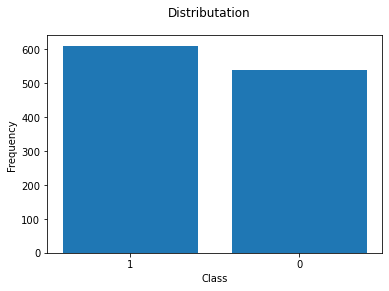

In [105]:

plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.bar( ("1","0"), frequency)
plt.suptitle("Distributation")
plt.show()

ok


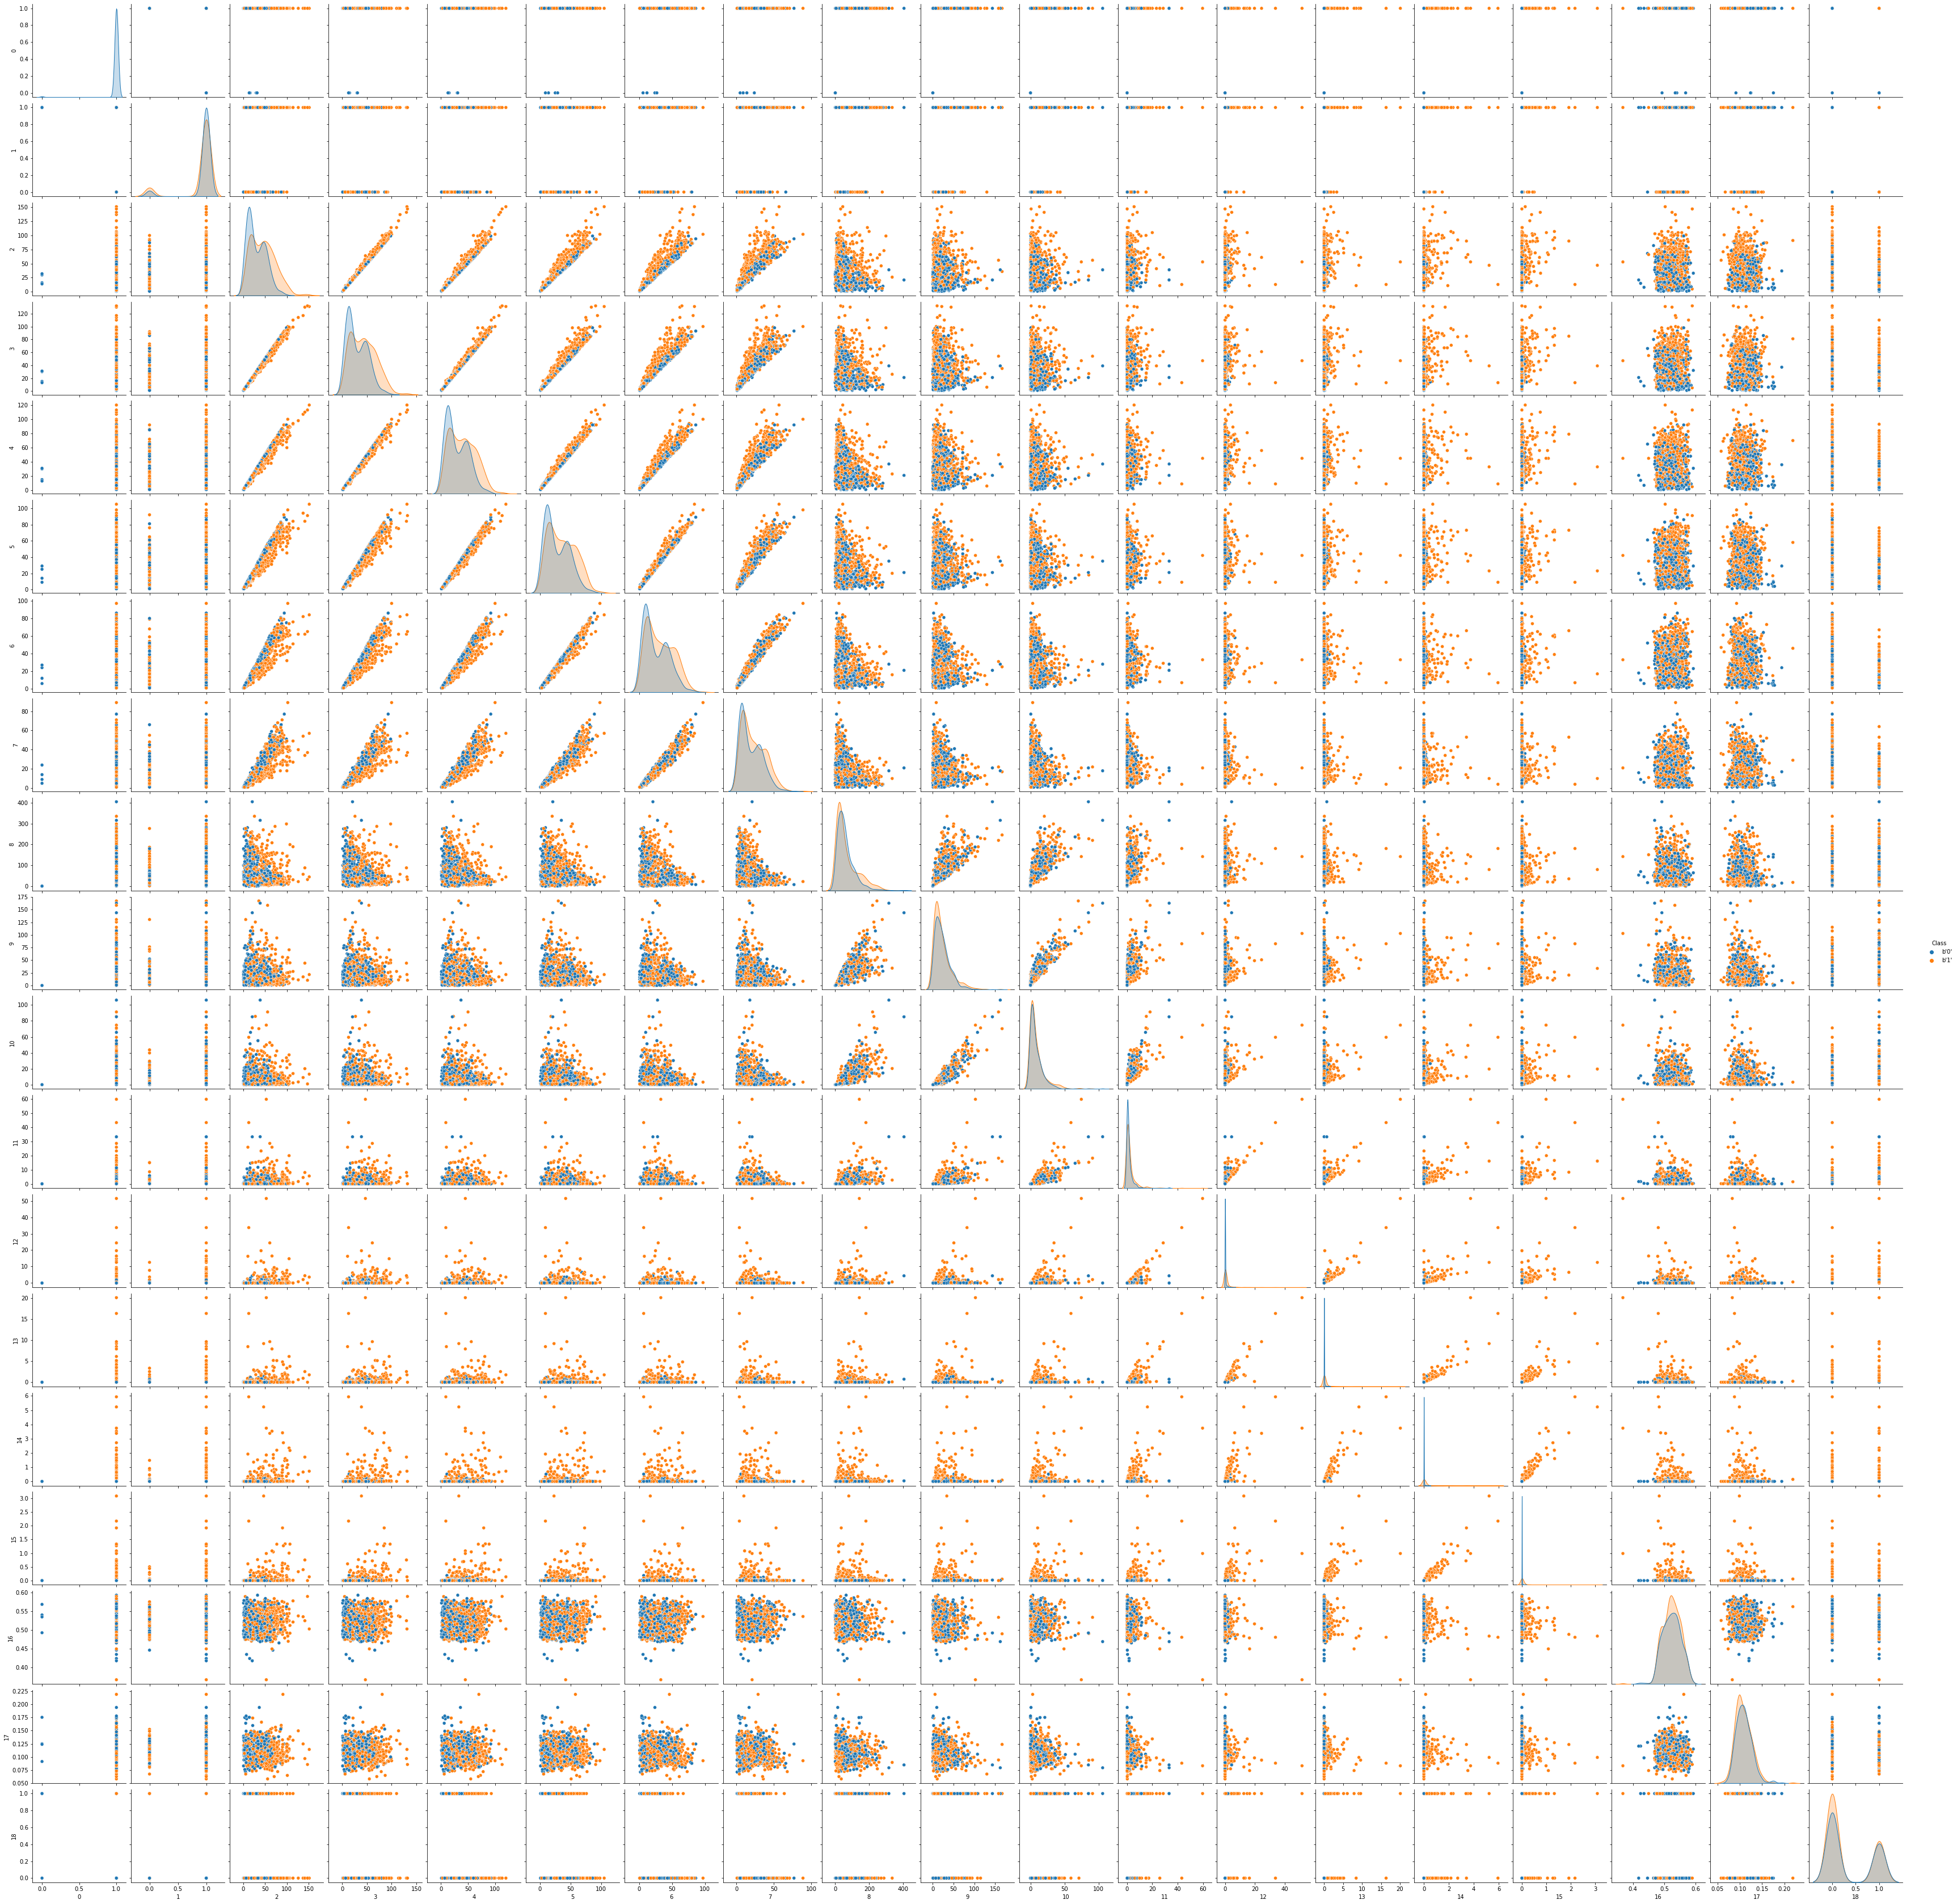

In [10]:
sns.pairplot(df, hue="Class")
print("ok")

<AxesSubplot:>

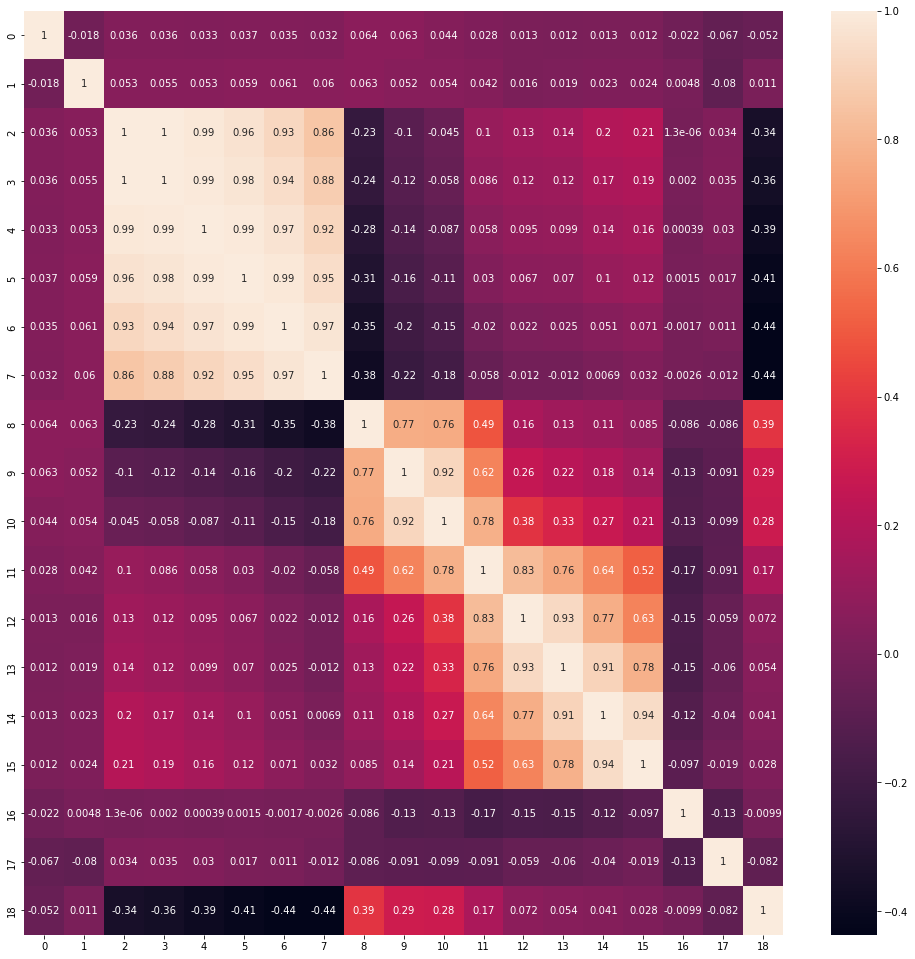

In [181]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot =True)


## Train and Test set

In [145]:
x = df.iloc[:,:-1]
# y = df.Class
#df.iloc[:,-1]
y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))


In [146]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)


In [147]:
StScale = StandardScaler()
X_test = StScale.fit_transform(X_test)
X_train = StScale.fit_transform(X_train)


## LogisticRegression

In [162]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

## LogisticRegression Analysis

In [152]:
predict = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       101
           1       0.78      0.65      0.71       130

    accuracy                           0.70       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.71      0.70      0.70       231

[[77 24]
 [46 84]]
0.696969696969697
0.6978450471097529
0.6966911764705882


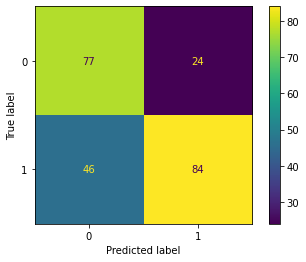

In [275]:
print (classification_report(y_test, predict) )
print( confusion_matrix (y_test, predict))
print(accuracy_score(y_test, predict))
print(f1_score(y_test, predict, average='weighted'))
print(f1_score(y_test, predict, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, predict)

## Support vector classification

In [185]:
SVM = SVC()

In [245]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
#     'Kernel': ['rbf', 'poly', 'sigmoid']
#     'degree':[2,3,4,5,6]
}
grid = GridSearchCV(SVC(), parameters,verbose=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5; 1/198] START C=0.1, gamma=scale........................................
[CV 1/5; 1/198] END .........C=0.1, gamma=scale;, score=0.658 total time=   0.0s
[CV 2/5; 1/198] START C=0.1, gamma=scale........................................
[CV 2/5; 1/198] END .........C=0.1, gamma=scale;, score=0.663 total time=   0.0s
[CV 3/5; 1/198] START C=0.1, gamma=scale........................................
[CV 3/5; 1/198] END .........C=0.1, gamma=scale;, score=0.603 total time=   0.0s
[CV 4/5; 1/198] START C=0.1, gamma=scale........................................
[CV 4/5; 1/198] END .........C=0.1, gamma=scale;, score=0.641 total time=   0.0s
[CV 5/5; 1/198] START C=0.1, gamma=scale........................................
[CV 5/5; 1/198] END .........C=0.1, gamma=scale;, score=0.592 total time=   0.0s
[CV 1/5; 2/198] START C=0.1, gamma=auto.........................................
[CV 1/5; 2/198] END ..........C=0.1, gamma=aut

[CV 4/5; 11/198] END ........C=0.1, gamma=0.008;, score=0.614 total time=   0.0s
[CV 5/5; 11/198] START C=0.1, gamma=0.008.......................................
[CV 5/5; 11/198] END ........C=0.1, gamma=0.008;, score=0.549 total time=   0.0s
[CV 1/5; 12/198] START C=0.01, gamma=scale......................................
[CV 1/5; 12/198] END .......C=0.01, gamma=scale;, score=0.527 total time=   0.0s
[CV 2/5; 12/198] START C=0.01, gamma=scale......................................
[CV 2/5; 12/198] END .......C=0.01, gamma=scale;, score=0.522 total time=   0.0s
[CV 3/5; 12/198] START C=0.01, gamma=scale......................................
[CV 3/5; 12/198] END .......C=0.01, gamma=scale;, score=0.522 total time=   0.0s
[CV 4/5; 12/198] START C=0.01, gamma=scale......................................
[CV 4/5; 12/198] END .......C=0.01, gamma=scale;, score=0.522 total time=   0.0s
[CV 5/5; 12/198] START C=0.01, gamma=scale......................................
[CV 5/5; 12/198] END .......

[CV 2/5; 22/198] END .......C=0.01, gamma=0.008;, score=0.522 total time=   0.0s
[CV 3/5; 22/198] START C=0.01, gamma=0.008......................................
[CV 3/5; 22/198] END .......C=0.01, gamma=0.008;, score=0.522 total time=   0.0s
[CV 4/5; 22/198] START C=0.01, gamma=0.008......................................
[CV 4/5; 22/198] END .......C=0.01, gamma=0.008;, score=0.522 total time=   0.0s
[CV 5/5; 22/198] START C=0.01, gamma=0.008......................................
[CV 5/5; 22/198] END .......C=0.01, gamma=0.008;, score=0.522 total time=   0.0s
[CV 1/5; 23/198] START C=0.001, gamma=scale.....................................
[CV 1/5; 23/198] END ......C=0.001, gamma=scale;, score=0.527 total time=   0.0s
[CV 2/5; 23/198] START C=0.001, gamma=scale.....................................
[CV 2/5; 23/198] END ......C=0.001, gamma=scale;, score=0.522 total time=   0.0s
[CV 3/5; 23/198] START C=0.001, gamma=scale.....................................
[CV 3/5; 23/198] END ......C

[CV 4/5; 32/198] END ......C=0.001, gamma=0.009;, score=0.522 total time=   0.0s
[CV 5/5; 32/198] START C=0.001, gamma=0.009.....................................
[CV 5/5; 32/198] END ......C=0.001, gamma=0.009;, score=0.522 total time=   0.0s
[CV 1/5; 33/198] START C=0.001, gamma=0.008.....................................
[CV 1/5; 33/198] END ......C=0.001, gamma=0.008;, score=0.527 total time=   0.0s
[CV 2/5; 33/198] START C=0.001, gamma=0.008.....................................
[CV 2/5; 33/198] END ......C=0.001, gamma=0.008;, score=0.522 total time=   0.0s
[CV 3/5; 33/198] START C=0.001, gamma=0.008.....................................
[CV 3/5; 33/198] END ......C=0.001, gamma=0.008;, score=0.522 total time=   0.0s
[CV 4/5; 33/198] START C=0.001, gamma=0.008.....................................
[CV 4/5; 33/198] END ......C=0.001, gamma=0.008;, score=0.522 total time=   0.0s
[CV 5/5; 33/198] START C=0.001, gamma=0.008.....................................
[CV 5/5; 33/198] END ......C

[CV 5/5; 43/198] END ........C=0.5, gamma=0.009;, score=0.598 total time=   0.0s
[CV 1/5; 44/198] START C=0.5, gamma=0.008.......................................
[CV 1/5; 44/198] END ........C=0.5, gamma=0.008;, score=0.636 total time=   0.0s
[CV 2/5; 44/198] START C=0.5, gamma=0.008.......................................
[CV 2/5; 44/198] END ........C=0.5, gamma=0.008;, score=0.663 total time=   0.0s
[CV 3/5; 44/198] START C=0.5, gamma=0.008.......................................
[CV 3/5; 44/198] END ........C=0.5, gamma=0.008;, score=0.603 total time=   0.0s
[CV 4/5; 44/198] START C=0.5, gamma=0.008.......................................
[CV 4/5; 44/198] END ........C=0.5, gamma=0.008;, score=0.647 total time=   0.0s
[CV 5/5; 44/198] START C=0.5, gamma=0.008.......................................
[CV 5/5; 44/198] END ........C=0.5, gamma=0.008;, score=0.587 total time=   0.0s
[CV 1/5; 45/198] START C=0.7, gamma=scale.......................................
[CV 1/5; 45/198] END .......

[CV 4/5; 54/198] END ........C=0.7, gamma=0.009;, score=0.636 total time=   0.0s
[CV 5/5; 54/198] START C=0.7, gamma=0.009.......................................
[CV 5/5; 54/198] END ........C=0.7, gamma=0.009;, score=0.630 total time=   0.0s
[CV 1/5; 55/198] START C=0.7, gamma=0.008.......................................
[CV 1/5; 55/198] END ........C=0.7, gamma=0.008;, score=0.674 total time=   0.0s
[CV 2/5; 55/198] START C=0.7, gamma=0.008.......................................
[CV 2/5; 55/198] END ........C=0.7, gamma=0.008;, score=0.658 total time=   0.0s
[CV 3/5; 55/198] START C=0.7, gamma=0.008.......................................
[CV 3/5; 55/198] END ........C=0.7, gamma=0.008;, score=0.609 total time=   0.0s
[CV 4/5; 55/198] START C=0.7, gamma=0.008.......................................
[CV 4/5; 55/198] END ........C=0.7, gamma=0.008;, score=0.641 total time=   0.0s
[CV 5/5; 55/198] START C=0.7, gamma=0.008.......................................
[CV 5/5; 55/198] END .......

[CV 2/5; 65/198] END ..........C=1, gamma=0.009;, score=0.663 total time=   0.0s
[CV 3/5; 65/198] START C=1, gamma=0.009.........................................
[CV 3/5; 65/198] END ..........C=1, gamma=0.009;, score=0.658 total time=   0.0s
[CV 4/5; 65/198] START C=1, gamma=0.009.........................................
[CV 4/5; 65/198] END ..........C=1, gamma=0.009;, score=0.647 total time=   0.0s
[CV 5/5; 65/198] START C=1, gamma=0.009.........................................
[CV 5/5; 65/198] END ..........C=1, gamma=0.009;, score=0.647 total time=   0.0s
[CV 1/5; 66/198] START C=1, gamma=0.008.........................................
[CV 1/5; 66/198] END ..........C=1, gamma=0.008;, score=0.679 total time=   0.0s
[CV 2/5; 66/198] START C=1, gamma=0.008.........................................
[CV 2/5; 66/198] END ..........C=1, gamma=0.008;, score=0.658 total time=   0.0s
[CV 3/5; 66/198] START C=1, gamma=0.008.........................................
[CV 3/5; 66/198] END .......

[CV 1/5; 76/198] END .........C=10, gamma=0.009;, score=0.745 total time=   0.0s
[CV 2/5; 76/198] START C=10, gamma=0.009........................................
[CV 2/5; 76/198] END .........C=10, gamma=0.009;, score=0.685 total time=   0.0s
[CV 3/5; 76/198] START C=10, gamma=0.009........................................
[CV 3/5; 76/198] END .........C=10, gamma=0.009;, score=0.734 total time=   0.0s
[CV 4/5; 76/198] START C=10, gamma=0.009........................................
[CV 4/5; 76/198] END .........C=10, gamma=0.009;, score=0.745 total time=   0.0s
[CV 5/5; 76/198] START C=10, gamma=0.009........................................
[CV 5/5; 76/198] END .........C=10, gamma=0.009;, score=0.707 total time=   0.0s
[CV 1/5; 77/198] START C=10, gamma=0.008........................................
[CV 1/5; 77/198] END .........C=10, gamma=0.008;, score=0.745 total time=   0.0s
[CV 2/5; 77/198] START C=10, gamma=0.008........................................
[CV 2/5; 77/198] END .......

[CV 2/5; 87/198] END .........C=50, gamma=0.009;, score=0.728 total time=   0.0s
[CV 3/5; 87/198] START C=50, gamma=0.009........................................
[CV 3/5; 87/198] END .........C=50, gamma=0.009;, score=0.712 total time=   0.0s
[CV 4/5; 87/198] START C=50, gamma=0.009........................................
[CV 4/5; 87/198] END .........C=50, gamma=0.009;, score=0.761 total time=   0.0s
[CV 5/5; 87/198] START C=50, gamma=0.009........................................
[CV 5/5; 87/198] END .........C=50, gamma=0.009;, score=0.712 total time=   0.0s
[CV 1/5; 88/198] START C=50, gamma=0.008........................................
[CV 1/5; 88/198] END .........C=50, gamma=0.008;, score=0.793 total time=   0.0s
[CV 2/5; 88/198] START C=50, gamma=0.008........................................
[CV 2/5; 88/198] END .........C=50, gamma=0.008;, score=0.717 total time=   0.0s
[CV 3/5; 88/198] START C=50, gamma=0.008........................................
[CV 3/5; 88/198] END .......

[CV 3/5; 98/198] END ........C=100, gamma=0.009;, score=0.717 total time=   0.0s
[CV 4/5; 98/198] START C=100, gamma=0.009.......................................
[CV 4/5; 98/198] END ........C=100, gamma=0.009;, score=0.783 total time=   0.0s
[CV 5/5; 98/198] START C=100, gamma=0.009.......................................
[CV 5/5; 98/198] END ........C=100, gamma=0.009;, score=0.728 total time=   0.0s
[CV 1/5; 99/198] START C=100, gamma=0.008.......................................
[CV 1/5; 99/198] END ........C=100, gamma=0.008;, score=0.793 total time=   0.0s
[CV 2/5; 99/198] START C=100, gamma=0.008.......................................
[CV 2/5; 99/198] END ........C=100, gamma=0.008;, score=0.728 total time=   0.0s
[CV 3/5; 99/198] START C=100, gamma=0.008.......................................
[CV 3/5; 99/198] END ........C=100, gamma=0.008;, score=0.717 total time=   0.0s
[CV 4/5; 99/198] START C=100, gamma=0.008.......................................
[CV 4/5; 99/198] END .......

[CV 3/5; 109/198] END .......C=150, gamma=0.009;, score=0.723 total time=   0.0s
[CV 4/5; 109/198] START C=150, gamma=0.009......................................
[CV 4/5; 109/198] END .......C=150, gamma=0.009;, score=0.783 total time=   0.0s
[CV 5/5; 109/198] START C=150, gamma=0.009......................................
[CV 5/5; 109/198] END .......C=150, gamma=0.009;, score=0.723 total time=   0.0s
[CV 1/5; 110/198] START C=150, gamma=0.008......................................
[CV 1/5; 110/198] END .......C=150, gamma=0.008;, score=0.799 total time=   0.0s
[CV 2/5; 110/198] START C=150, gamma=0.008......................................
[CV 2/5; 110/198] END .......C=150, gamma=0.008;, score=0.750 total time=   0.0s
[CV 3/5; 110/198] START C=150, gamma=0.008......................................
[CV 3/5; 110/198] END .......C=150, gamma=0.008;, score=0.712 total time=   0.0s
[CV 4/5; 110/198] START C=150, gamma=0.008......................................
[CV 4/5; 110/198] END ......

[CV 2/5; 120/198] END .......C=170, gamma=0.009;, score=0.755 total time=   0.0s
[CV 3/5; 120/198] START C=170, gamma=0.009......................................
[CV 3/5; 120/198] END .......C=170, gamma=0.009;, score=0.728 total time=   0.0s
[CV 4/5; 120/198] START C=170, gamma=0.009......................................
[CV 4/5; 120/198] END .......C=170, gamma=0.009;, score=0.783 total time=   0.0s
[CV 5/5; 120/198] START C=170, gamma=0.009......................................
[CV 5/5; 120/198] END .......C=170, gamma=0.009;, score=0.717 total time=   0.0s
[CV 1/5; 121/198] START C=170, gamma=0.008......................................
[CV 1/5; 121/198] END .......C=170, gamma=0.008;, score=0.804 total time=   0.0s
[CV 2/5; 121/198] START C=170, gamma=0.008......................................
[CV 2/5; 121/198] END .......C=170, gamma=0.008;, score=0.761 total time=   0.0s
[CV 3/5; 121/198] START C=170, gamma=0.008......................................
[CV 3/5; 121/198] END ......

[CV 3/5; 131/198] END .......C=180, gamma=0.009;, score=0.728 total time=   0.0s
[CV 4/5; 131/198] START C=180, gamma=0.009......................................
[CV 4/5; 131/198] END .......C=180, gamma=0.009;, score=0.783 total time=   0.0s
[CV 5/5; 131/198] START C=180, gamma=0.009......................................
[CV 5/5; 131/198] END .......C=180, gamma=0.009;, score=0.717 total time=   0.0s
[CV 1/5; 132/198] START C=180, gamma=0.008......................................
[CV 1/5; 132/198] END .......C=180, gamma=0.008;, score=0.804 total time=   0.0s
[CV 2/5; 132/198] START C=180, gamma=0.008......................................
[CV 2/5; 132/198] END .......C=180, gamma=0.008;, score=0.761 total time=   0.0s
[CV 3/5; 132/198] START C=180, gamma=0.008......................................
[CV 3/5; 132/198] END .......C=180, gamma=0.008;, score=0.717 total time=   0.0s
[CV 4/5; 132/198] START C=180, gamma=0.008......................................
[CV 4/5; 132/198] END ......

[CV 3/5; 142/198] END .......C=190, gamma=0.009;, score=0.723 total time=   0.0s
[CV 4/5; 142/198] START C=190, gamma=0.009......................................
[CV 4/5; 142/198] END .......C=190, gamma=0.009;, score=0.783 total time=   0.0s
[CV 5/5; 142/198] START C=190, gamma=0.009......................................
[CV 5/5; 142/198] END .......C=190, gamma=0.009;, score=0.717 total time=   0.0s
[CV 1/5; 143/198] START C=190, gamma=0.008......................................
[CV 1/5; 143/198] END .......C=190, gamma=0.008;, score=0.804 total time=   0.0s
[CV 2/5; 143/198] START C=190, gamma=0.008......................................
[CV 2/5; 143/198] END .......C=190, gamma=0.008;, score=0.761 total time=   0.0s
[CV 3/5; 143/198] START C=190, gamma=0.008......................................
[CV 3/5; 143/198] END .......C=190, gamma=0.008;, score=0.723 total time=   0.0s
[CV 4/5; 143/198] START C=190, gamma=0.008......................................
[CV 4/5; 143/198] END ......

[CV 1/5; 153/198] END .......C=200, gamma=0.009;, score=0.804 total time=   0.0s
[CV 2/5; 153/198] START C=200, gamma=0.009......................................
[CV 2/5; 153/198] END .......C=200, gamma=0.009;, score=0.772 total time=   0.0s
[CV 3/5; 153/198] START C=200, gamma=0.009......................................
[CV 3/5; 153/198] END .......C=200, gamma=0.009;, score=0.723 total time=   0.0s
[CV 4/5; 153/198] START C=200, gamma=0.009......................................
[CV 4/5; 153/198] END .......C=200, gamma=0.009;, score=0.777 total time=   0.0s
[CV 5/5; 153/198] START C=200, gamma=0.009......................................
[CV 5/5; 153/198] END .......C=200, gamma=0.009;, score=0.717 total time=   0.0s
[CV 1/5; 154/198] START C=200, gamma=0.008......................................
[CV 1/5; 154/198] END .......C=200, gamma=0.008;, score=0.804 total time=   0.0s
[CV 2/5; 154/198] START C=200, gamma=0.008......................................
[CV 2/5; 154/198] END ......

[CV 1/5; 164/198] END .......C=220, gamma=0.009;, score=0.804 total time=   0.0s
[CV 2/5; 164/198] START C=220, gamma=0.009......................................
[CV 2/5; 164/198] END .......C=220, gamma=0.009;, score=0.766 total time=   0.0s
[CV 3/5; 164/198] START C=220, gamma=0.009......................................
[CV 3/5; 164/198] END .......C=220, gamma=0.009;, score=0.723 total time=   0.0s
[CV 4/5; 164/198] START C=220, gamma=0.009......................................
[CV 4/5; 164/198] END .......C=220, gamma=0.009;, score=0.777 total time=   0.0s
[CV 5/5; 164/198] START C=220, gamma=0.009......................................
[CV 5/5; 164/198] END .......C=220, gamma=0.009;, score=0.723 total time=   0.0s
[CV 1/5; 165/198] START C=220, gamma=0.008......................................
[CV 1/5; 165/198] END .......C=220, gamma=0.008;, score=0.804 total time=   0.0s
[CV 2/5; 165/198] START C=220, gamma=0.008......................................
[CV 2/5; 165/198] END ......

[CV 5/5; 174/198] END .......C=250, gamma=0.001;, score=0.728 total time=   0.0s
[CV 1/5; 175/198] START C=250, gamma=0.009......................................
[CV 1/5; 175/198] END .......C=250, gamma=0.009;, score=0.810 total time=   0.0s
[CV 2/5; 175/198] START C=250, gamma=0.009......................................
[CV 2/5; 175/198] END .......C=250, gamma=0.009;, score=0.772 total time=   0.0s
[CV 3/5; 175/198] START C=250, gamma=0.009......................................
[CV 3/5; 175/198] END .......C=250, gamma=0.009;, score=0.723 total time=   0.0s
[CV 4/5; 175/198] START C=250, gamma=0.009......................................
[CV 4/5; 175/198] END .......C=250, gamma=0.009;, score=0.772 total time=   0.0s
[CV 5/5; 175/198] START C=250, gamma=0.009......................................
[CV 5/5; 175/198] END .......C=250, gamma=0.009;, score=0.707 total time=   0.0s
[CV 1/5; 176/198] START C=250, gamma=0.008......................................
[CV 1/5; 176/198] END ......

[CV 1/5; 186/198] END .......C=300, gamma=0.009;, score=0.804 total time=   0.0s
[CV 2/5; 186/198] START C=300, gamma=0.009......................................
[CV 2/5; 186/198] END .......C=300, gamma=0.009;, score=0.772 total time=   0.0s
[CV 3/5; 186/198] START C=300, gamma=0.009......................................
[CV 3/5; 186/198] END .......C=300, gamma=0.009;, score=0.712 total time=   0.0s
[CV 4/5; 186/198] START C=300, gamma=0.009......................................
[CV 4/5; 186/198] END .......C=300, gamma=0.009;, score=0.772 total time=   0.0s
[CV 5/5; 186/198] START C=300, gamma=0.009......................................
[CV 5/5; 186/198] END .......C=300, gamma=0.009;, score=0.696 total time=   0.0s
[CV 1/5; 187/198] START C=300, gamma=0.008......................................
[CV 1/5; 187/198] END .......C=300, gamma=0.008;, score=0.810 total time=   0.0s
[CV 2/5; 187/198] START C=300, gamma=0.008......................................
[CV 2/5; 187/198] END ......

[CV 1/5; 197/198] END ......C=1000, gamma=0.009;, score=0.821 total time=   0.0s
[CV 2/5; 197/198] START C=1000, gamma=0.009.....................................
[CV 2/5; 197/198] END ......C=1000, gamma=0.009;, score=0.745 total time=   0.0s
[CV 3/5; 197/198] START C=1000, gamma=0.009.....................................
[CV 3/5; 197/198] END ......C=1000, gamma=0.009;, score=0.739 total time=   0.0s
[CV 4/5; 197/198] START C=1000, gamma=0.009.....................................
[CV 4/5; 197/198] END ......C=1000, gamma=0.009;, score=0.750 total time=   0.0s
[CV 5/5; 197/198] START C=1000, gamma=0.009.....................................
[CV 5/5; 197/198] END ......C=1000, gamma=0.009;, score=0.717 total time=   0.0s
[CV 1/5; 198/198] START C=1000, gamma=0.008.....................................
[CV 1/5; 198/198] END ......C=1000, gamma=0.008;, score=0.810 total time=   0.0s
[CV 2/5; 198/198] START C=1000, gamma=0.008.....................................
[CV 2/5; 198/198] END ......

{'C': 180, 'gamma': 0.01}

In [246]:
grid.best_estimator_

SVC(C=180, gamma=0.01)

## Support vector classification Analysis

In [247]:
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       101
           1       0.84      0.69      0.76       130

    accuracy                           0.75       231
   macro avg       0.76      0.76      0.75       231
weighted avg       0.77      0.75      0.75       231

[[84 17]
 [40 90]]
0.7532467532467533
0.753885327049884
0.7530801687763713


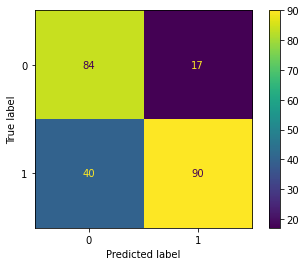

In [274]:
print (classification_report(y_test, grid_predictions) )
print( confusion_matrix (y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))
print(f1_score(y_test, grid_predictions, average='weighted'))
print(f1_score(y_test, grid_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)

## Decision tree

In [258]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Decision tree Analysis

In [259]:
tree_predictions = tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.51      0.65      0.57       101
           1       0.65      0.51      0.57       130

    accuracy                           0.57       231
   macro avg       0.58      0.58      0.57       231
weighted avg       0.59      0.57      0.57       231

[[66 35]
 [64 66]]
0.5714285714285714
0.5714285714285714
0.5714285714285714


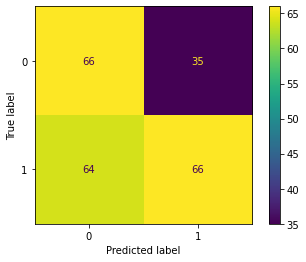

In [273]:
print (classification_report(y_test, tree_predictions) )
print( confusion_matrix (y_test, tree_predictions))
print(accuracy_score(y_test, tree_predictions))
print(f1_score(y_test, tree_predictions, average='weighted'))
print(f1_score(y_test, tree_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions)


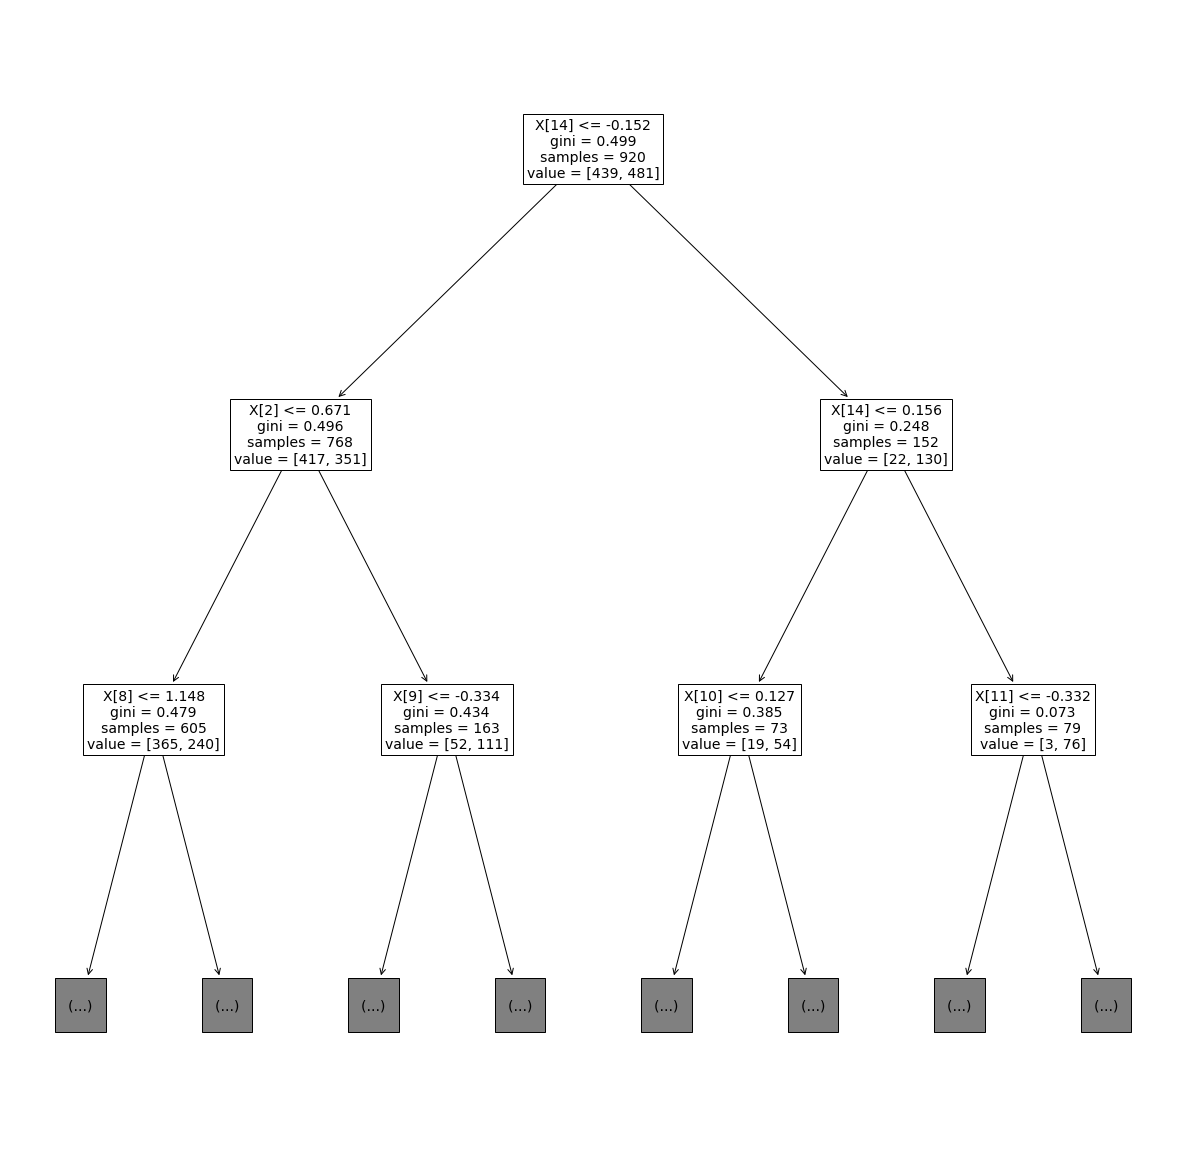

In [316]:
plt.figure(figsize=(21,21))
plot_tree(tree, max_depth = 2, fontsize=14);

## Random Forest